### 딩고 프리스타일 간단한 분석

데이터는 전 유튜브 크롤링한 데이터를 기반으로 했습니다.

*참고: <https://shinminyong.tistory.com/10?category=835486>

In [1]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import re
from konlpy.tag import Kkma

In [3]:
# 데이터 로드
dingo = pd.read_csv("dingo.csv")

In [4]:
dingo

,name,thumbnail,view,previous_time,video_url,start_date,comment,likes_num,unlikes_num
0,세상에 공개 되면 안 되는 미방분 모음! / [영리한 문제아들] 비하인드 : 미방분...,https://i.ytimg.com/vi/hDRlWn78e6A/hqdefault.j...,8.7만회,16시간 전,http://www.youtube.com/watch?v=hDRlWn78e6A,•2020. 6. 7.,댓글 451개,2.3천개,24개
1,이 집 제육볶음 잘 하네... I [어이~ 오씨~] 오담률 (김농밀) I TEASER,https://i.ytimg.com/vi/-biNhiZx3SU/hqdefault.j...,18만회,3일 전,http://www.youtube.com/watch?v=-biNhiZx3SU,•2020. 6. 5.,댓글 864개,2.6천개,51개
2,나이 많은 사람은 힙합을 싫어한다고?! 트로트랩을 들은 어르신들의 반응은 과연......,https://i.ytimg.com/vi/FgZjW_QMTW8/hqdefault.j...,20만회,4일 전,http://www.youtube.com/watch?v=FgZjW_QMTW8,•2020. 6. 4.,"댓글 1,590개",4.3천개,63개
3,"[4K] MBC 힙합걸Z (브린(Bryn), 하선호(Sandy), 이영지)의 킬링벌...",https://i.ytimg.com/vi/UDex1bH2vbM/hqdefault.j...,122만회,1주 전,http://www.youtube.com/watch?v=UDex1bH2vbM,•최초 공개: 2020. 5. 29.,"댓글 6,339개",2.8만개,710개
4,남초 회사 근무중... 어떤 오빠가 제일 문제일까? | [영리한 문제아들 EP.4]...,https://i.ytimg.com/vi/JLjQMj9uidM/hqdefault.j...,38만회,1주 전,http://www.youtube.com/watch?v=JLjQMj9uidM,•최초 공개: 2020. 5. 28.,"댓글 1,971개",6.6천개,125개
5,Rohann (이로한)의 첫 정규앨범 NEVERLAND✨✨ | [집에 갈래?] 변하...,https://i.ytimg.com/vi/hjzKy20G6Lg/hqdefault.j...,11만회,1주 전,http://www.youtube.com/watch?v=hjzKy20G6Lg,•2020. 5. 27.,댓글 391개,2.4천개,28개
6,"수퍼비, 트월킹이다 질문받는다 | [영리한 문제아들] 비하인드 : 댓글 읽기",https://i.ytimg.com/vi/r_5gsfcH-Wg/hqdefault.j...,25만회,1주 전,http://www.youtube.com/watch?v=r_5gsfcH-Wg,•2020. 5. 26.,"댓글 1,960개",5.4천개,78개
7,(전) 던밀스 (역)🎉🎉 드디어 싹이 보이는 딩고 VMC 콜라보...? / [던밀...,https://i.ytimg.com/vi/TxevvmA4uho/hqdefault.j...,32만회,2주 전,http://www.youtube.com/watch?v=TxevvmA4uho,•2020. 5. 25.,"댓글 1,262개",5.3천개,67개
8,트로트랩 (Melody Ver.) | [Official Lyric Video] 수퍼...,https://i.ytimg.com/vi/NE8rtMcB15A/hqdefault.j...,46만회,2주 전,http://www.youtube.com/watch?v=NE8rtMcB15A,•2020. 5. 23.,"댓글 2,970개",9.1천개,105개
9,내일 발매될 스월비 정규앨범 미리듣기! I [앨범 스포일러] 스월비 (Swervy)...,https://i.ytimg.com/vi/vbKRXir7114/hqdefault.j...,12만회,2주 전,http://www.youtube.com/watch?v=vbKRXir7114,•2020. 5. 22.,댓글 734개,2.4천개,76개


#### 전처리

In [5]:
# start_date의 날짜만 남겨놓기 위해 전처리
dingo['start_date'] = dingo['start_date'].replace("최초 공개","",regex=True).replace("•","",regex=True).replace(":","",regex=True).replace("\.$","",regex=True).str.replace(" ","")

In [6]:
#view의 만회를 실질적인 숫자로 변경
dingo['view'] = dingo['view'].replace({'만회':'*10000'},regex=True).map(pd.eval).astype(int)

In [7]:
#comment컬럼도 숫자만 처리
dingo['comment']=dingo['comment'].str.replace(",","").str.replace(r'(\w+\s)',"").str.replace("개","").astype(int)

In [8]:
#likes컬럼 천개,만개 숫자로 변경
dingo['likes_num'] = dingo['likes_num'].replace({'만개':'*10000','천개':'*1000'},regex=True).map(pd.eval).astype(int)

In [9]:
#unlikes_num 개 제거
dingo['unlikes_num'] = dingo['unlikes_num'].replace({'개':'','천':'*1000'},regex=True).map(pd.eval).astype(int)

In [10]:
#참고하는 사이트처럼 이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [11]:
#분석에 어긋나는 불용어구 제외 (특수문자, 의성어) 제거
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [12]:
title_ls = []
for i in range(len(dingo)):
    a = re.sub(emoji_pattern,"",dingo['name'].iloc[i])
    
    b = re.sub(han,"",a)
    
    title_ls.append(b)

dingo['name'] = title_ls

#### 상관관계 측정

In [13]:
corr = dingo[['view','likes_num','comment','unlikes_num']].corr()

In [14]:
corr

,view,likes_num,comment,unlikes_num
view,1.000000,0.948911,0.878170,0.673823
likes_num,0.948911,1.000000,0.727610,0.524275
comment,0.878170,0.727610,1.000000,0.838011
unlikes_num,0.673823,0.524275,0.838011,1.000000


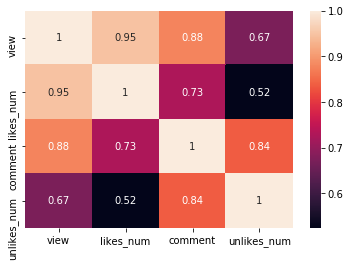

In [15]:
#대체적으로 상관관계가 높은것으로 판단된다
sns.heatmap(corr,annot=True)

#### 타이틀 토큰화

In [20]:
dingo['name'].str.split()

0     [세상에, 공개, 되면, 안, 되는, 미방분, 모음, /, [영리한, 문제아들], ...
1     [이, 집, 제육볶음, 잘, 하네, I, [어이, 오씨], 오담률, (김농밀), I...
2     [나이, 많은, 사람은, 힙합을, 싫어한다고, 트로트랩을, 들은, 어르신들의, 반응...
3     [[4K], MBC, 힙합걸Z, (브린(Bryn), 하선호(Sandy), 이영지)의...
4     [남초, 회사, 근무중, 어떤, 오빠가, 제일, 문제일까, |, [영리한, 문제아들...
5     [Rohann, (이로한)의, 첫, 정규앨범, NEVERLAND✨✨, |, [집에,...
6     [수퍼비, 트월킹이다, 질문받는다, |, [영리한, 문제아들], 비하인드, :, 댓...
7     [(전), 던밀스, (역), 드디어, 싹이, 보이는, 딩고, VMC, 콜라보, /,...
8     [트로트랩, (Melody, Ver), |, [Official, Lyric, Vid...
9     [내일, 발매될, 스월비, 정규앨범, 미리듣기, I, [앨범, 스포일러], 스월비,...
10    [우리, 트웰브, 콘서트, 갈, 건데, 트월킹, 너도, 올래, /, [영리한, 문제...
11    [영앤리치, ______를, 속여라, |, [영리한, 문제아들, EP3], 트웰브는...
12       [※그레이의, 첫, 번째, 자작곡, 유출※, /, 브이터뷰, [V-Terview]]
13    [[4K], 언에듀케이티드, 키드의, 킬링벌스를, 라이브로, |, 돈벌러가야대, U...
14    [비주얼, 보이그룹, LEGIT, GOONS, 눈물의, 데뷔, 무대, (w, 넉살,...
15    [[MV], GRAY, -, Moon, Blue, |, [DF, FILM], DF,...
Name: name, dtype: object